All Credit Goes to the below site:

https://www.dataquest.io/blog/python-tutorial-analyze-personal-netflix-data/

# Load Your Data into a Jupyter Notebook

In [1]:
import pandas as pd

The website URL can be read directlyinto pandas as follows:

In [2]:
df = pd.read_csv("https://www.dataquest.io/wp-content/uploads/2020/11/ViewingActivity-sample.csv")



In [3]:
df.shape

(200, 10)

In [4]:
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)


# Preparing the Data for Analysis
Before we can do our number-crunching, let's clean up this data a bit to make it easier to work with.

### Dropping Unnecessary Columns (Optional)
First, we'll start by dropping the columns we're not planning to use. This is totally optional, and it's probably not a good idea for large-scale or ongoing projects. But for a small-scale personal project like this, it can be nice to work with a dataframe that includes only columns we're actually using.

In this case, we're planning to analyze how much and when I've watched The Office, so we'll need to keep the Start Time, Duration, and Title columns. Everything else can go.

To do this, we'll use df.drop() and pass it two arguments:

1)  A list of the columns we'd like to drop

2)  axis=1, which tells pandas to drop columns

Here's what it looks like:

In [5]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head()

,Start Time,Duration,Title
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 4:27:45,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 4:05:21,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-20 0:20:03,0:48:14,The Invisible War
4,2013-03-20 0:10:31,0:04:51,The Invisible War


# Converting Strings to Datetime and Timedelta in Pandas
The data in our two time-related columns certainly looks correct, but what format is this data actually being stored in? We can use df.dtypes to get a quick list of the data types for each column in our dataframe:

In [6]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

As we can see here, all three columns are stored as object, which means they're strings. That's fine for the Title column, but we need to change the two time-related columns into the correct datatypes before we can work with them.

Specifically, we need to do the following:

Convert Start Time to datetime (a data and time format pandas can understand and perform calculations with)
Convert Start Time from UTC to our local timezone
Convert Duration to timedelta (a time duration format pandas can understand and perform calculations with)
So, let's approach those tasks in that order, starting with converting Start Time to datetime using pandas's pd.to_datetime().

We'll also add the optional argument utc=True so that our datetime data has the UTC timezone attached to it. This is important, since we'll need to convert it to a different timezone in the next step.

We'll then run df.dtypes again just to confirm that this has worked as expected.

In [7]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

Now we've got that column in the correct format, it's time to change the timezone so that when we do our analysis, we'll see everything in local time.

We can convert datetimes to any timezone using the .tz_convert() and passing it an argument with the string for the timezone we want to convert to. In this case, that's 'US/Eastern'. To find your specific timezone, here's a handy reference of TZ timezone options:

https://en.wikipedia.org/wiki/List_of_tz_database_time_zones

The tricky bit here is that we can only use ***.tz_convert()*** on a DatetimeIndex, so we need to set our Start Time column as the index using set_index() before we perform the conversion.

In this tutorial, we'll then use reset_index() to turn it back into a regular column afterwards. Depending on your preference and goals, this may not be necessary, but for the purposes of simplicity here, we'll try to do our analysis with all of our data in columns rather than having some of it as the index.

Putting all of that together looks like this: (My zone is The North American Central Time Zone (CT))

***Side note get this to work in central time once my data comes in***

In [8]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to The North American Central Time Zone
df.index = df.index.tz_convert('US/Eastern')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head(1)

,Start Time,Duration,Title
0,2013-03-20 01:17:53-04:00,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...


We can see this is correct because the previous first row in our dataset had a Start Time of 2020-10-29 03:27:48. During Daylight Savings Time, the U.S. Eastern time zone is four hours behind UTC, so we can see that our conversion has happened correctly!

Now, let's deal with our Duration column. This is, as the name suggests, a duration — ***a measure of a length of time.*** So, rather than converting it to a datetime, we need to convert it to a ***timedelta, which is a measure of time duration that pandas understands.***

This is very similar to what we did when converting the Start Time column. We'll just need to use ***pd.to_timedelta()*** and pass it the column we want to convert as an argument.

Once again, we'll use df.dtypes to quickly check our work.

In [9]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object

# Filtering Strings by Substring in pandas Using str.contains
There are many ways we could approach filtering The Office views. For our purposes here, though, we're going to create a new dataframe called office and populate it only with rows where the Title column contains 'The Office (U.S.)'.

We can do this using str.contains(), giving it two arguments:

'The Office (U.S.)', which is the substring we're using to pick out only episodes of The Office.
regex=False, which tells the function that the previous argument is a string and not a regular expression.

In [10]:
# create a new dataframe called office that that takes from df
# only the rows in which the Title column contains 'The Office (U.S.)'
office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]


Once we've done this, there are a few ways we could double-check our work. For example, we could use office.sample(20) to inspect a random ten rows of our new office dataframe. If all twenty rows contained Office episodes, we could be pretty confident things worked as expected.

For if the purposes of preserving a little privacy in this tutorial, though, I'll run office.shape to check the size of the new dataframe. Since this dataframe should contain only my views of The Office, we should expect it to have significantly fewer rows than the 27,000+ row df dataset.

In [11]:
office.shape

(137, 3)

In [12]:
office.sample(20)

,Start Time,Duration,Title
132,2013-03-09 20:52:07-05:00,0 days 00:21:32,The Office (U.S.): Season 7: Michael's Last Du...
94,2013-03-12 00:11:10-04:00,0 days 00:20:54,The Office (U.S.): Season 2: Dwight's Speech (...
61,2013-03-14 01:33:24-04:00,0 days 00:21:12,The Office (U.S.): Season 3: Business School (...
149,2013-03-09 01:27:51-05:00,0 days 00:10:54,The Office (U.S.): Season 7: The Sting (Episod...
48,2013-03-15 02:03:33-04:00,0 days 00:21:11,The Office (U.S.): Season 3: The Job (Episode 23)
89,2013-03-12 10:51:11-04:00,0 days 00:00:52,The Office (U.S.): Season 2: Conflict Resoluti...
118,2013-03-10 20:26:12-04:00,0 days 00:20:35,The Office (U.S.): Season 2: The Dundies (Epis...
133,2013-03-09 20:25:05-05:00,0 days 00:21:29,The Office (U.S.): Season 7: Training Day (Epi...
151,2013-03-08 21:36:40-05:00,0 days 00:21:43,The Office (U.S.): Season 7: Sex Ed (Episode 4)
26,2013-03-17 00:48:28-04:00,0 days 00:21:41,The Office (U.S.): Season 4: Did I Stutter (Ep...


# Analyzing the Data
***How much time have I spent watching The Office?***

First, let's answer the big question: How much time have I spent watching The Office?

Since we've already got our Duration column in a format that pandas can compute, answering this question is quite straightforward. We can use .sum() to add up the total duration:

In [13]:
office['Duration'].sum()

Timedelta('1 days 15:00:39')

thats 1 day 15 hours zero mins and 39 seconds

# When do I watch The Office?
Let's answer this question in two different ways:

1) On which days of the week have I watched the most Office episodes?

2) During which hours of the day do I most often start Office episodes?

We'll start with a little prep work that'll make these tasks a little more straightforward: creating new columns for "weekday" and "hour".

We can use the .dt.weekday and .dt.hour methods on the Start Time column to do this and assign the results to new columns named weekday and hour:

In [14]:
office2 = office.copy(deep=True)
office2.loc[:, 'Weekday'] = office2.loc[:, 'Start Time'].dt.weekday
office2.loc[:, 'Hour'] = office2.loc[:, 'Start Time'].dt.hour

# check to make sure the columns were added correctly
office2.head(1)

,Start Time,Duration,Title,Weekday,Hour
9,2013-03-18 19:25:36-04:00,0 days 00:00:02,The Office (U.S.): Season 5: The Duel (Episode...,0,19


Now, let's do a little analysis! These results will be easier to understand visually, so we'll start by using the %matplotlib inline magic to make our charts show up in our Jupyter notebook. Then, we'll import matplotlib.

In [15]:
%matplotlib inline
import matplotlib

Now, let's plot a chart of my viewing habits by day of the week. To do this, we'll need to work through a few steps:

Tell pandas the order we want to chart the days in using pd.Categorical — by default, it will plot them in descending order based on the number of episodes watched on each day, but when looking at a graph, it'll be more intuitive to see the data in Monday-Sunday order.
Count the number of episodes I viewed on each day in total
Sort and plot the data
(There are also many other ways we could approach analyzing and visualizing this data, of course.)

Let's see how it looks step by step:

## Figure out how to change the numbers into the days of the week. As of now if we try the data outpot is zero or none

<AxesSubplot:title={'center':'Office eposodes Watched By Day'}>

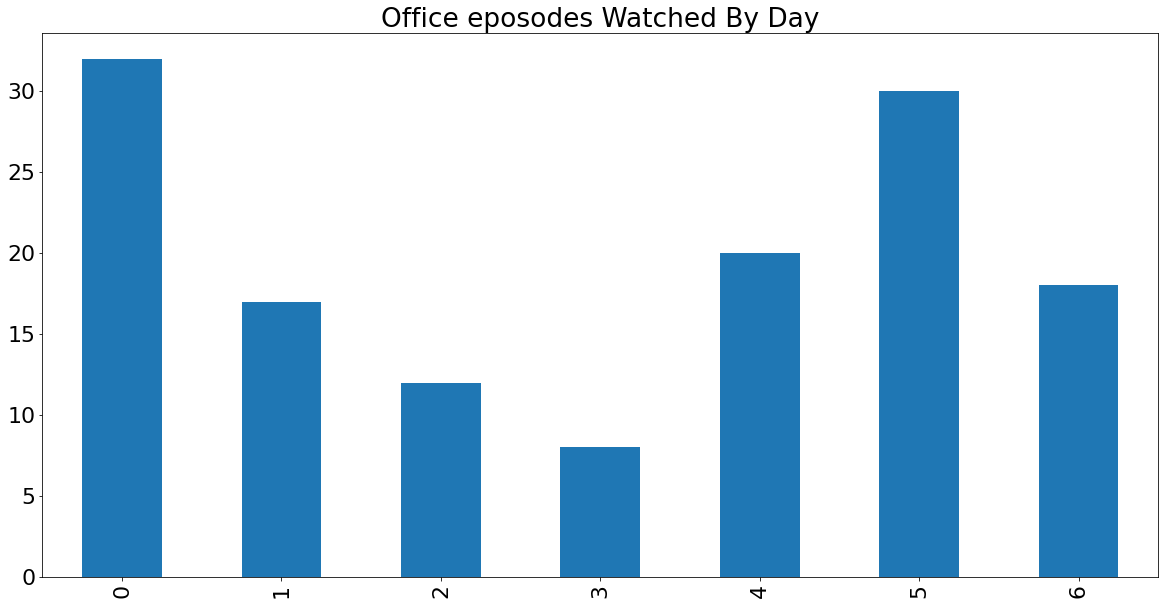

In [18]:
# set our categorical and define the order so the days are plotted Monday - Sunday
office2['Weekday'] = pd.Categorical(office2['Weekday'], categories= [0,1,2,3,4,5,6], ordered=True)

# create office_by_date and count the rows for each weekday, assigning the result to that variable
office_by_day = office2['Weekday'].value_counts()

# sort the index using our categoraical, so that Monday (0)  is forst, Tuesday (1) is second, etc.
office_by_day = office_by_day.sort_index()

# optional: ipdate the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot office by day as a bar chart with the listed size and title
office_by_day.plot(kind='bar', figsize=(20,10), title='Office eposodes Watched By Day')


Now, let's take a look at the same data by hour. The process here is very similar to what we just did above:

<AxesSubplot:title={'center':'Office Episodes Watched by Hour'}>

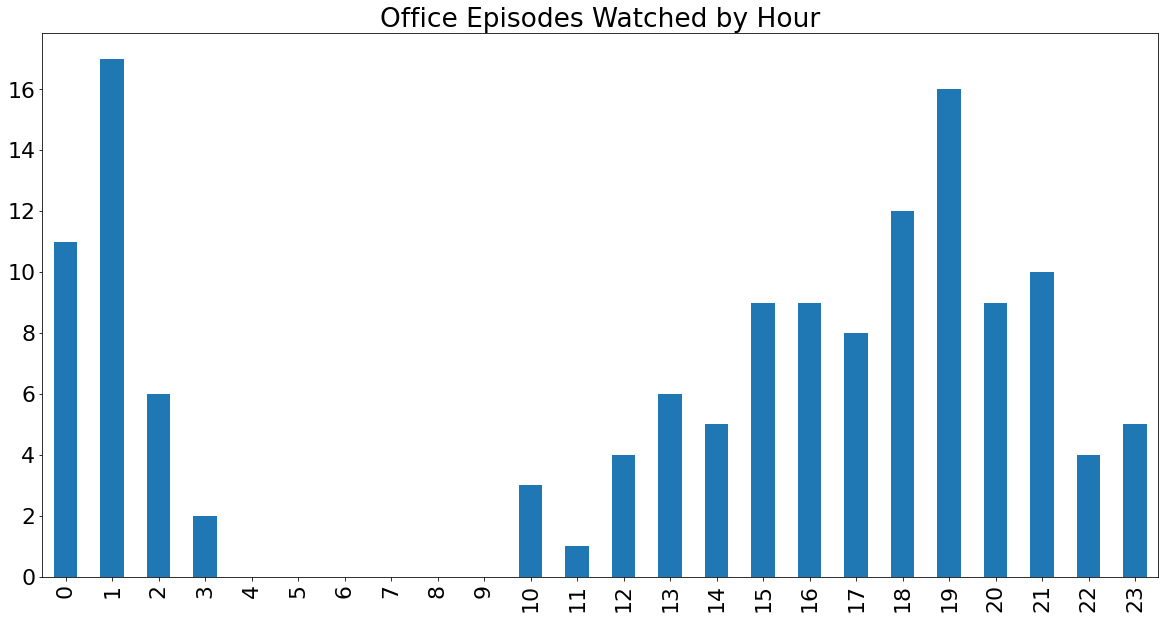

In [17]:
# set our categorical and define the order so the hours are plotted 0-23
office2['Hour'] = pd.Categorical(office2['Hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# create office_by_hour and count the rows for each hour, assigning the result to that variable
office_by_hour = office2['Hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
office_by_hour = office_by_hour.sort_index()

# plot office_by_hour as a bar chart with the listed size and title
office_by_hour.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Hour')

From the data, it looks like 6 p.m. and 7 p.m. were the hours during which I most often started episodes of The Office. 

Outside of that, it's no surprise to see that most of my viewing happened during the evenings.


What's Next?
In this tutorial, we've taken a quick dive into some personal Netflix data and learned that — among other things — I watch The Office too much. But there are tons of places you could go from here! Here are some ideas for expanding this project for yourself:

Do the same or similar analysis for another show.
See if you can create separate columns for show titles and episode titles using regular expressions [learn to use those in our Advanced Data Cleaning course)
Figure out which specific episodes you've watched most and least
Create prettier charts (our Storytelling with Data Visualization course can help with that)